## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [594]:
# student 1: Oren Ilutowich 318901303
# student 2: Roee Bloch 318846722   
# student 3: Daniel Vasserman 325698934
# student 4: Gil Harary 209185230
# (optional) student 5:
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

In [595]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [596]:
#load the two datasets
test_df = pd.read_csv("titanic_test.csv")
train_df = pd.read_csv("titanic_train.csv")

In [597]:
print("Test dataset:")
test_df.head()

Test dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [598]:
print("Train dataset:")
train_df.head()

Train dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


#### EDA

In [599]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.363128,0.675978,30.366983,0.502793,0.368715,31.507239,0.351955,0.340782
std,0.812116,0.469321,12.246691,1.278053,0.819923,49.254330,0.639640,0.475302
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,12.000000,0.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,27.825000,1.000000,1.000000
max,3.000000,1.000000,71.000000,8.000000,5.000000,263.000000,3.000000,1.000000


In [600]:
# Showing a cross tabulation to show how many survived from each port of embarkation
pd.crosstab(test_df['Embarked'],test_df['Survived'])

Survived,0,1
Embarked,,
0,94,37
1,17,17
2,7,6
3,0,1


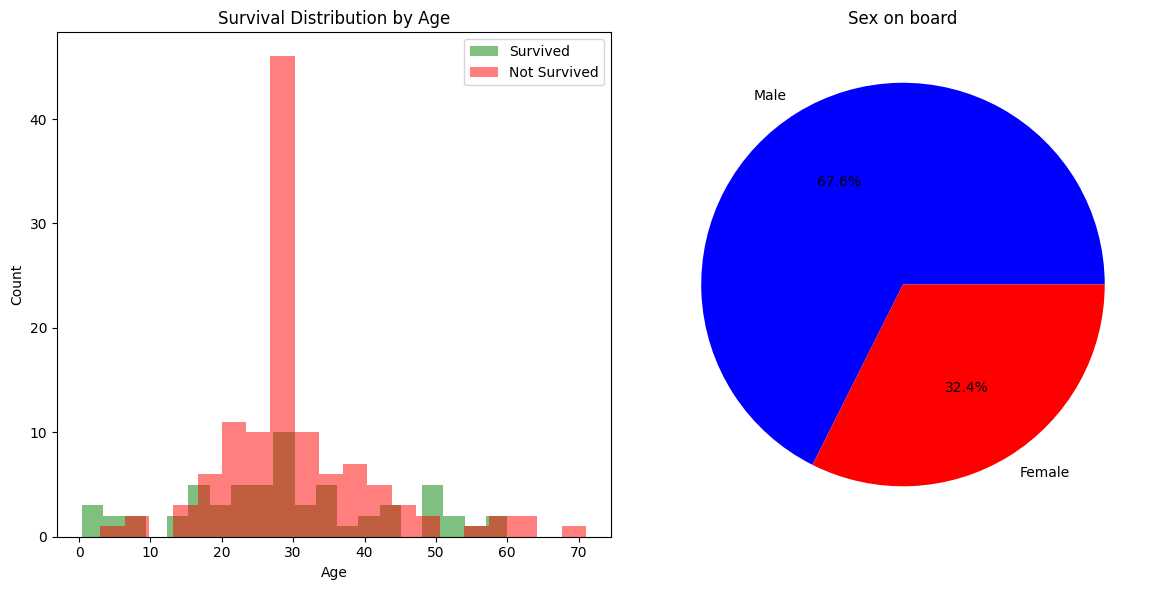

In [601]:
# Extract rows into two sets where column "Survived" is 1 (survived) and 0 (not survived)
survived_data = test_df[test_df['Survived'] == 1]
not_survived_data = test_df[test_df['Survived'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Add first plot of the survival distribution by age
axes[0].hist(survived_data['Age'], bins=20, color='green', alpha=0.5, label='Survived')
axes[0].hist(not_survived_data['Age'], bins=20, color='red', alpha=0.5, label='Not Survived')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Survival Distribution by Age')
axes[0].legend()

# Adding another plot for Sex on board
survival_counts = test_df['Sex'].value_counts()
axes[1].pie(survival_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'red'])
axes[1].set_title('Sex on board')

plt.tight_layout()
plt.show()

#### Feature Engineering

In [602]:
# Combining SibSp and Parch into one 'FamilySize' column
# train dataframe
FamilySize = train_df['SibSp'] + train_df['Parch'] + 1  # +1 for the person himself
train_df['SibSp'] = FamilySize
train_df.rename(columns={'SibSp': 'FamilySize'}, inplace=True)
train_df.drop(columns=['Parch'], inplace=True)

#test dataframe
FamilySize = test_df['SibSp'] + test_df['Parch'] + 1  # +1 for the person himself
test_df['SibSp'] = FamilySize
test_df.rename(columns={'SibSp': 'FamilySize'}, inplace=True)
test_df.drop(columns=['Parch'], inplace=True)

In [603]:
# In the column 'Embarked' the value 3 appears only once, so replace it  
# train dataframe
most_frequent_value = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].replace(3, most_frequent_value)

# test dataframe
most_frequent_value = test_df['Embarked'].mode()[0]
test_df['Embarked'] = test_df['Embarked'].replace(3, most_frequent_value)

In [604]:
# Bin the age column
# train dataframe
train_df['Age'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 80], labels=False, right=False)

# test dataframe
test_df['Age'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 80], labels=False, right=False)

,Pclass,Sex,Age,FamilySize,Fare,Embarked,Survived
0,1,0,2.0,2,78.2667,1,1
1,2,0,2.0,1,13.5000,0,1
2,3,1,2.0,1,9.5000,0,0
3,3,1,2.0,1,7.8958,0,0
4,3,1,2.0,1,8.0500,0,0
...,...,...,...,...,...,...,...
707,1,1,2.0,1,51.8625,0,0
708,3,1,1.0,8,46.9000,0,0
709,2,0,0.0,2,33.0000,0,1
710,2,1,2.0,1,0.0000,0,0


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## Part 4 - Apply on test and show model performance estimation